In [1]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io
%matplotlib inline

In [11]:
matfile = 'train_data/img_data_0.mat'
matdata = scipy.io.loadmat(matfile)
X_0 = matdata['out']
matdata['out'].shape

(9432, 128, 128)

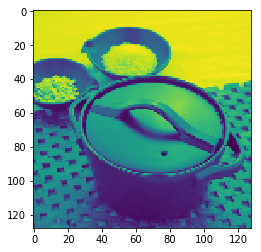

In [12]:
plt.imshow(matdata['out'][10,:,:])

In [13]:
matfile = 'train_data/img_label_0.mat'
matdata = scipy.io.loadmat(matfile)
matdata['out'].shape
Y_0 = matdata['out']

In [14]:
Y_0.shape

(1, 9432)

In [15]:
type(Y_0)#[0,2500]

numpy.ndarray

In [16]:
np.unique(Y_0)

array([  5,   9,  15,  67,  74,  77,  86, 104, 120])

In [17]:
np.bincount(Y_0[0,:])

array([   0,    0,    0,    0,    0, 1547,    0,    0,    0,  446,    0,
          0,    0,    0,    0,  962,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1018,    0,    0,    0,    0,    0,    0,  599,    0,    0,
        406,    0,    0,    0,    0,    0,    0,    0,    0,  629,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 1888,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1937])

In [18]:
Y_pd_0 = pd.DataFrame(Y_0[0,:])

In [19]:
Y_pd_0.columns

RangeIndex(start=0, stop=1, step=1)

In [20]:
Y_pd_0 = Y_pd_0.rename(columns={0:"Cat"})

In [21]:
Y_pd_0.head(2)

,Cat
0,5
1,5


In [22]:
type(Y_pd_0["Cat"])

pandas.core.series.Series

In [23]:
Y_pd_0["Cat"].value_counts()

120    1937
104    1888
5      1547
67     1018
15      962
86      629
74      599
9       446
77      406
Name: Cat, dtype: int64

In [24]:
img_X={}
img_Y={}
for i in range(20):
    X_lbl = 'train_data/img_data_'+str(i)+'.mat'
    Y_lbl = 'train_data/img_label_'+str(i)+'.mat'
    X = scipy.io.loadmat(X_lbl)
    Y = scipy.io.loadmat(Y_lbl)
    img_X[i] = X["out"]
    img_Y[i] = Y["out"]

In [25]:
X = []
Y = []

In [26]:
X = np.concatenate((img_X[0],img_X[1]),axis=0)

In [27]:
X = np.concatenate((img_Y[0],img_Y[1]),axis=1)

In [28]:
X.shape

(1, 18876)

In [29]:
X = img_X[0]
Y = img_Y[0]
for i in range(1,20):
    X = np.concatenate((X,img_X[i]),axis=0)
    Y = np.concatenate((Y,img_Y[i]),axis=1)
    img_X[i]=[]
    img_Y[i]=[]

In [30]:
X.shape

(182417, 128, 128)

In [31]:
Y.shape

(1, 182417)

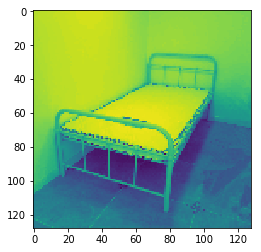

In [32]:
plt.imshow(X[10000,:,:])

In [33]:
Y_pd = pd.DataFrame(Y[0,:])

In [34]:
Y_pd = Y_pd.rename(columns={0:"Cat"})

In [35]:
Y_pd.head()

,Cat
0,5
1,5
2,5
3,5
4,5


In [36]:
Y_pd_dummies = pd.get_dummies(Y_pd["Cat"], prefix="Cat")

In [37]:
Y_pd_dummies.shape

(182417, 128)

In [38]:
Y_pd_dummies.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,...,Cat_119,Cat_120,Cat_121,Cat_122,Cat_123,Cat_124,Cat_125,Cat_126,Cat_127,Cat_128
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# normalize X
X /= 255

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'B') according to the casting rule ''same_kind''

In [ ]:
Y_pd["Cat"].value_counts()

In [ ]:
X.shape

In [ ]:
X[0,:,:] = X[0,:,:]/255

In [ ]:
X[0,:,:].max()

In [ ]:
for i in range(1,20):
    X[i,:,:] = X[i,:,:]/255

In [ ]:
#X = X.astype('float')
X =[]
X =1

# Actual Code beigns -------------

## 1) Load Data into X & Y

In [16]:
X_lbl = 'train_data/img_data_'+str(0)+'.mat'
Y_lbl = 'train_data/img_label_'+str(0)+'.mat'
X = scipy.io.loadmat(X_lbl)["out"][0:2,:,:].astype('float32')/255
Y = scipy.io.loadmat(Y_lbl)["out"][0,0:2].astype('float32')

In [15]:
X[0:1,:,:].shape

(1, 128, 128)

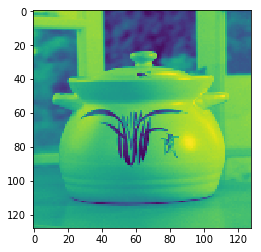

In [4]:
plt.imshow(X[1,:,:])

In [17]:
n_max = 100
Y_cat_count ={}
for i in range(1,20):
    print(i)
    X_lbl = 'train_data/img_data_'+str(i)+'.mat'
    Y_lbl = 'train_data/img_label_'+str(i)+'.mat'
    interim_X = scipy.io.loadmat(X_lbl)["out"].astype('float32')
    interim_Y = scipy.io.loadmat(Y_lbl)["out"].astype('float32')
    for j in range(interim_X.shape[0]):
        if not(interim_Y[0,j] in Y_cat_count):
            X = np.concatenate((X,interim_X[j:j+1,:,:]),axis=0)
            Y = np.concatenate((Y,interim_Y[0,j:j+1]),axis=0)
            Y_cat_count[interim_Y[0,j]] = 1
        elif Y_cat_count[interim_Y[0,j]]<n_max:
            X = np.concatenate((X,interim_X[j:j+1,:,:]),axis=0)
            Y = np.concatenate((Y,interim_Y[0,j:j+1]),axis=0)
            Y_cat_count[interim_Y[0,j]] += 1
    print(i)    
    interim_X = []
    interim_Y = []

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19


In [18]:
Y_cat_count

{1.0: 100,
 2.0: 100,
 3.0: 100,
 4.0: 100,
 6.0: 100,
 7.0: 100,
 8.0: 100,
 10.0: 100,
 11.0: 100,
 12.0: 100,
 13.0: 100,
 14.0: 100,
 16.0: 100,
 17.0: 100,
 18.0: 100,
 19.0: 100,
 20.0: 100,
 21.0: 100,
 22.0: 100,
 23.0: 100,
 24.0: 100,
 25.0: 100,
 26.0: 100,
 27.0: 100,
 28.0: 100,
 29.0: 100,
 30.0: 100,
 31.0: 100,
 32.0: 100,
 33.0: 100,
 34.0: 100,
 35.0: 100,
 36.0: 100,
 37.0: 100,
 38.0: 100,
 39.0: 100,
 40.0: 100,
 41.0: 100,
 42.0: 100,
 43.0: 100,
 44.0: 100,
 45.0: 100,
 46.0: 100,
 47.0: 100,
 48.0: 100,
 49.0: 100,
 50.0: 100,
 51.0: 100,
 52.0: 100,
 53.0: 100,
 54.0: 100,
 55.0: 100,
 56.0: 100,
 57.0: 100,
 58.0: 100,
 59.0: 100,
 60.0: 100,
 61.0: 100,
 62.0: 100,
 63.0: 100,
 64.0: 100,
 65.0: 100,
 66.0: 100,
 68.0: 100,
 69.0: 100,
 70.0: 100,
 71.0: 100,
 72.0: 100,
 73.0: 100,
 75.0: 100,
 76.0: 100,
 77.0: 100,
 78.0: 100,
 79.0: 100,
 80.0: 100,
 81.0: 100,
 82.0: 100,
 83.0: 100,
 84.0: 100,
 85.0: 100,
 87.0: 100,
 88.0: 100,
 89.0: 100,
 90.0: 100,

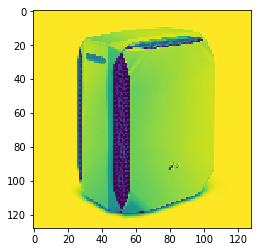

In [33]:
plt.imshow(X[12,:,:])

In [34]:
Y[12]

77.0

## Convert to probability format

In [35]:
X.shape

(12002, 128, 128)

In [36]:
Y.shape

(12002,)

In [37]:
Y_pd = pd.DataFrame(Y)

In [39]:
Y_pd = Y_pd.rename(columns={0:"Cat"})

In [42]:
Y_pd["Cat"].dtype

dtype('float32')

In [48]:
Y_pd_dummies = pd.get_dummies(Y_pd["Cat"],prefix="Cat")

In [49]:
Y_pd_dummies.shape

(12002, 121)

In [50]:
Y_pd_dummies.head(2)

,Cat_1.0,Cat_2.0,Cat_3.0,Cat_4.0,Cat_5.0,Cat_6.0,Cat_7.0,Cat_8.0,Cat_10.0,Cat_11.0,...,Cat_118.0,Cat_119.0,Cat_121.0,Cat_122.0,Cat_123.0,Cat_124.0,Cat_125.0,Cat_126.0,Cat_127.0,Cat_128.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
Y_pd_dummies["Cat_1.0"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11972    0
11973    0
11974    0
11975    0
11976    0
11977    0
11978    0
11979    0
11980    0
11981    0
11982    0
11983    0
11984    0
11985    0
11986    0
11987    0
11988    0
11989    0
11990    0
11991    0
11992    0
11993    0
11994    0
11995    0
11996    0
11997    0
11998    0
11999    0
12000    0
12001    0
Name: Cat_1.0, Length: 12002, dtype: uint8

## Neural Network Imports

In [52]:
import os
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam

/home/anto/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [54]:
X.mean()

0.66617715

In [58]:
X = np.expand_dims(X, axis=4)
print(X.shape)

(12002, 128, 128, 1)


In [59]:
input_shape = X[0].shape

In [60]:
num_classes = 121
model = []
model = Sequential()

model.add(Convolution2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/home/anto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/home/anto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [61]:
Y_np_dummies = Y_pd_dummies.as_matrix()
Y_np_columns = Y_pd_dummies.columns

In [62]:
Y_np_dummies.shape

(12002, 121)

In [63]:
type(Y_np_dummies)

numpy.ndarray

## Training & visualization

In [83]:
num_epoch =20
# Training
hist = model.fit(X, Y_np_dummies, batch_size=200, nb_epoch=num_epoch, verbose=1)


/home/anto/anaconda3/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
12002/12002 [==============================] - 1033s - loss: 4.6816 - acc: 0.0236  
Epoch 2/20
12002/12002 [==============================] - 994s - loss: 4.6255 - acc: 0.0283   
Epoch 3/20
12002/12002 [==============================] - 995s - loss: 4.5777 - acc: 0.0336   
Epoch 4/20
12002/12002 [==============================] - 995s - loss: 4.4991 - acc: 0.0374   
Epoch 5/20
12002/12002 [==============================] - 997s - loss: 4.4267 - acc: 0.0450   
Epoch 6/20
12002/12002 [==============================] - 997s - loss: 4.3702 - acc: 0.0501   
Epoch 7/20
12002/12002 [==============================] - 996s - loss: 4.3068 - acc: 0.0540   
Epoch 8/20
12002/12002 [==============================] - 997s - loss: 4.2514 - acc: 0.0606   
Epoch 9/20
12002/12002 [==============================] - 996s - loss: 4.1834 - acc: 0.0702   
Epoch 10/20
12002/12002 [==============================] - 997s - loss: 4.1277 - acc: 0.0727   
Epoch 11/20
12002/12002 [========================

In [82]:
from keras.models import load_model
model.save('model_v3.hdf5')

In [78]:
print(type(np.array(Y_np_columns)))
matfile = 'Y_columns.mat'
scipy.io.savemat(matfile, mdict={'out':np.array(Y_np_columns) }, oned_as='row')

<class 'numpy.ndarray'>


In [70]:
Y_np_columns

Index(['Cat_1.0', 'Cat_2.0', 'Cat_3.0', 'Cat_4.0', 'Cat_5.0', 'Cat_6.0',
       'Cat_7.0', 'Cat_8.0', 'Cat_10.0', 'Cat_11.0',
       ...
       'Cat_118.0', 'Cat_119.0', 'Cat_121.0', 'Cat_122.0', 'Cat_123.0',
       'Cat_124.0', 'Cat_125.0', 'Cat_126.0', 'Cat_127.0', 'Cat_128.0'],
      dtype='object', length=121)